## Import Section
Import all the necessary libraries.
We are going to use transformers in order to use a pretrained model from huggingface



In [10]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

## Pretrained Model Usage
The pretrained model we are using is 'txlm-roberta-hindi-sentiment' from hugging face.
In order to use the model we require some imports for model and tokenizer as done below.

In [2]:
tokenizer = AutoTokenizer.from_pretrained("LondonStory/txlm-roberta-hindi-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("LondonStory/txlm-roberta-hindi-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

# Data Extraction and Processing
Now we create a dictionary for the converstation and process it as a pandas dataframe for sentiment analysis and other preprocessing

In [14]:
conversation = {"Recovery Agent": ["नमस्ते श्री कुमार, मैं एक्स वाई जेड फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी",
                                   "सर, आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है?",
                                   "ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है",
                                   "हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं?",
                                   " ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बाकी का क्या प्लान है आपका?",
                                   "ठीक है। तो हम ऐसा करते हैं - आप अगले हफ्ते तक आधा EMI जमा कर दीजिए, और अगले महीने के 15 तारीख तक बाकी का भुगतान कर दीजिए। क्या यह आपको स्वीकार है?",
                                   " बहुत अच्छा। मैं आपको एक SMS भेज रहा हूं जिसमें भुगतान की डिटेल्स होंगी। कृपया इसका पालन करें और समय पर भुगतान करें",
                                   "आपका स्वागत है। अगर कोई और सवाल हो तो मुझे बताइएगा। अलविदा"],
                "Borrower":["हां, बोलिए। क्या बात है?",
                            "हां, थोड़ी दिक्कत है। मेरी नौकरी चली गई है और मैं नया काम ढूंढ रहा हूं",
                            " मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है?",
                            "मैं कोशिश करूंगा, लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा?",
                            "मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा। तब मैं बाकी बकाया चुका दूंगा",
                            "हां, यह ठीक रहेगा। मैं इस प्लान का पालन करने की पूरी कोशिश करूंगा",
                            "ठीक है, धन्यवाद आपके समझने के लिए",
                            "अलविदा"]}

conversation_dataframe = pd.DataFrame([(k, v) for k, values in conversation.items() for v in values], columns=['Speaker', 'Utterance'])
conversation_dataframe

,Speaker,Utterance
0,Recovery Agent,"नमस्ते श्री कुमार, मैं एक्स वाई जेड फाइनेंस से..."
1,Recovery Agent,"सर, आपका पिछले महीने का EMI अभी तक नहीं आया है..."
2,Recovery Agent,"ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा ..."
3,Recovery Agent,हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते त...
4,Recovery Agent,"ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बा..."
5,Recovery Agent,ठीक है। तो हम ऐसा करते हैं - आप अगले हफ्ते तक ...
6,Recovery Agent,बहुत अच्छा। मैं आपको एक SMS भेज रहा हूं जिसमे...
7,Recovery Agent,आपका स्वागत है। अगर कोई और सवाल हो तो मुझे बता...
8,Borrower,"हां, बोलिए। क्या बात है?"
9,Borrower,"हां, थोड़ी दिक्कत है। मेरी नौकरी चली गई है और ..."


# Sentiment Analysis for Conversation Utterances
We now create a function that will go through each of the conversation utterance and analyze it with the pretrained model and give us the predicted class and its confidence score. The predicted classes are already being defined by the pretrained model itself on huggingface.

In [24]:
classes = ['negative', 'neutral', 'positive'] # This is the order defined by the pretrained model itself

def get_sentiments(conversation):
  for idx, row in conversation.iterrows():
    inputs = tokenizer(row['Utterance'], return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax().item()
    conversation.at[idx, 'Sentiment'] = classes[predicted_class]
    conversation.at[idx, 'Confidence'] = logits[0, predicted_class].detach().numpy()

  return conversation

sentiments = get_sentiments(conversation_dataframe)
sentiments

,Speaker,Utterance,Sentiment,Confidence
0,Recovery Agent,"नमस्ते श्री कुमार, मैं एक्स वाई जेड फाइनेंस से...",positive,2.443504
1,Recovery Agent,"सर, आपका पिछले महीने का EMI अभी तक नहीं आया है...",negative,2.298132
2,Recovery Agent,"ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा ...",positive,1.805701
3,Recovery Agent,हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते त...,positive,1.835177
4,Recovery Agent,"ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बा...",positive,1.974061
5,Recovery Agent,ठीक है। तो हम ऐसा करते हैं - आप अगले हफ्ते तक ...,neutral,1.147583
6,Recovery Agent,बहुत अच्छा। मैं आपको एक SMS भेज रहा हूं जिसमे...,positive,2.959290
7,Recovery Agent,आपका स्वागत है। अगर कोई और सवाल हो तो मुझे बता...,positive,1.493427
8,Borrower,"हां, बोलिए। क्या बात है?",neutral,0.514283
9,Borrower,"हां, थोड़ी दिक्कत है। मेरी नौकरी चली गई है और ...",negative,3.093242


# Visualization and Plotting
Now we made the string sentiment to a numeric value for visual representation and plotting**

In [25]:
sentiment_map = {
    "negative": 0,
    "neutral": 1,
    "positive" : 2
}  # We can set this as per our requirement

sentiments['Sentiment Value'] = sentiments['Sentiment'].map(sentiment_map)
sentiments

,Speaker,Utterance,Sentiment,Confidence,Sentiment Value
0,Recovery Agent,"नमस्ते श्री कुमार, मैं एक्स वाई जेड फाइनेंस से...",positive,2.443504,2
1,Recovery Agent,"सर, आपका पिछले महीने का EMI अभी तक नहीं आया है...",negative,2.298132,0
2,Recovery Agent,"ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा ...",positive,1.805701,2
3,Recovery Agent,हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते त...,positive,1.835177,2
4,Recovery Agent,"ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बा...",positive,1.974061,2
5,Recovery Agent,ठीक है। तो हम ऐसा करते हैं - आप अगले हफ्ते तक ...,neutral,1.147583,1
6,Recovery Agent,बहुत अच्छा। मैं आपको एक SMS भेज रहा हूं जिसमे...,positive,2.959290,2
7,Recovery Agent,आपका स्वागत है। अगर कोई और सवाल हो तो मुझे बता...,positive,1.493427,2
8,Borrower,"हां, बोलिए। क्या बात है?",neutral,0.514283,1
9,Borrower,"हां, थोड़ी दिक्कत है। मेरी नौकरी चली गई है और ...",negative,3.093242,0


Finally we use matplotlib to plot the analysis of the conversation over time.

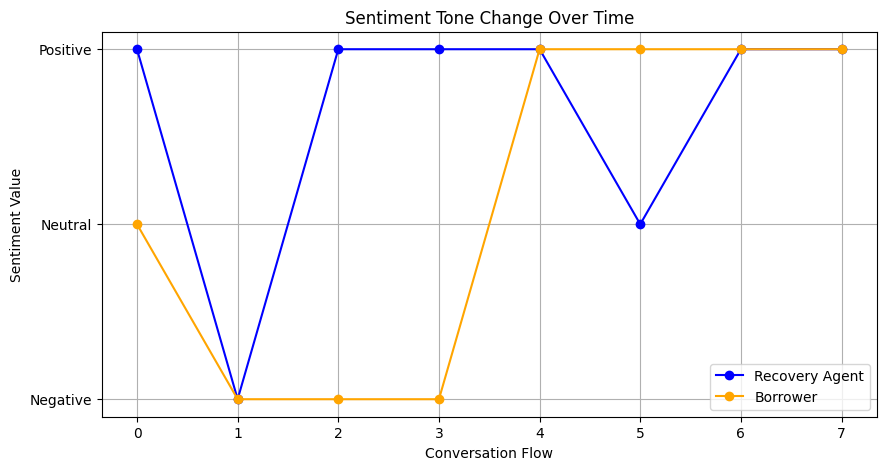

In [39]:
import matplotlib.pyplot as plt

sentiments.reset_index(drop=True, inplace=True)

recovery_agent_sentiments = sentiments[sentiments['Speaker'] == 'Recovery Agent']['Sentiment Value']
borrower_sentiments = sentiments[sentiments['Speaker'] == 'Borrower']['Sentiment Value']


recovery_agent_sentiments.reset_index(drop=True, inplace=True)
borrower_sentiments.reset_index(drop=True, inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(recovery_agent_sentiments, marker='o', linestyle='-', label='Recovery Agent', color='blue')
plt.plot(borrower_sentiments, marker='o', linestyle='-', label='Borrower', color='orange')

plt.title("Sentiment Tone Change Over Time")
plt.xlabel("Conversation Flow")
plt.ylabel("Sentiment Value")
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])  # Order and Values should be same as the defined above
plt.legend()
plt.grid()
plt.show()